In [78]:
# import pandas as pd
# from datetime import datetime

# # Load the dataset
# data = pd.read_excel('Homestays_Data1.xlsx')

# # Remove duplicate rows if any
# data = data.drop_duplicates()

# # Handle missing values if any
# data = data.dropna(subset=['host_since', 'last_review'])

# # Convert date columns to datetime format
# data['host_since'] = pd.to_datetime(data['host_since'])
# data['last_review'] = pd.to_datetime(data['last_review'])
# current_date = datetime.now()

# # Feature Engineering
# data['Host_Tenure'] = (current_date - data['host_since']).dt.days / 365.25  # Calculate host tenure in years
# data['Amenities_Count'] = data['amenities'].apply(lambda x: len(x.split(',')))  # Count amenities
# data['Days_Since_Last_Review'] = (current_date - data['last_review']).dt.days  # Calculate days since last review

# # Split amenities into separate columns
# amenities = set()
# for index, row in data.iterrows():
#     for amenity in row['amenities'].replace('{', '').replace('}', '').replace('"', '').split(','):
#         amenities.add(amenity.strip())

# # Create columns for each amenity and populate with binary values
# for amenity in amenities:
#     data[amenity] = data['amenities'].apply(lambda x: 1 if amenity in x else 0)

# # Save the cleaned and engineered dataset with amenities split
# data.to_csv('Cleaned Data.csv', index=False)


C:\Users\arunp\AppData\Local\Temp\ipykernel_3644\3225826706.py:6: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Cleaned Data.csv')
C:\Users\arunp\AppData\Local\Temp\ipykernel_3644\3225826706.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


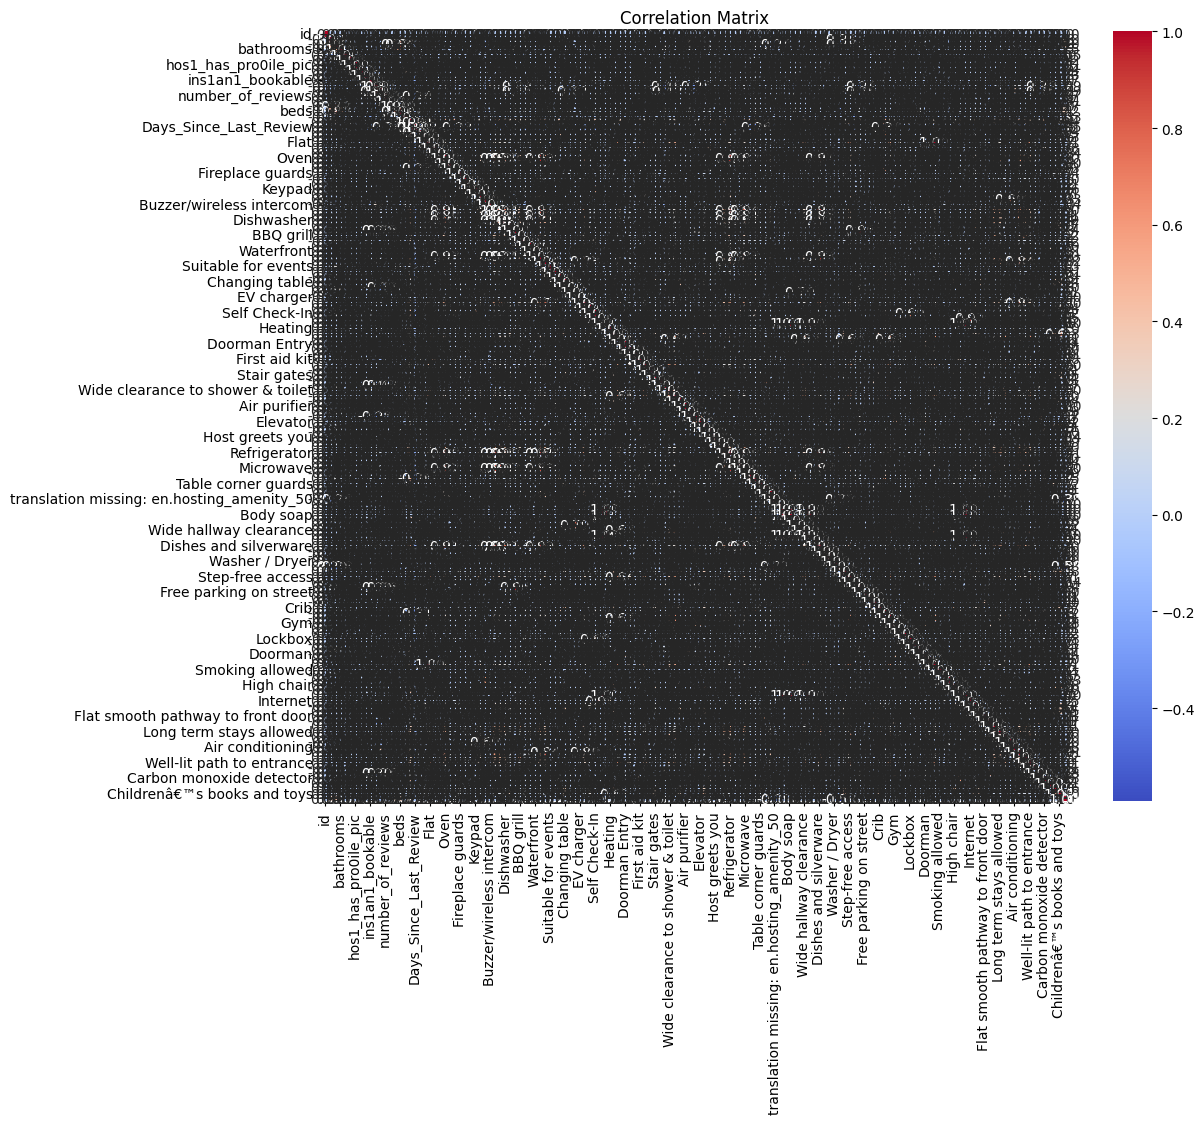

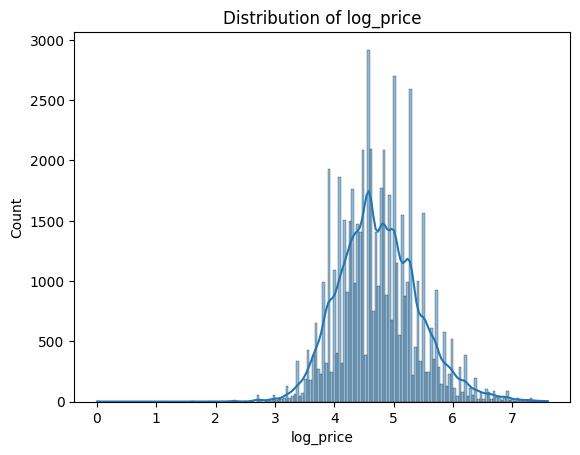

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
data = pd.read_csv('Cleaned Data.csv')

# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Histograms for numerical features
sns.histplot(data['log_price'], kde=True)
plt.title('Distribution of log_price')
plt.show()


In [80]:
!pip install folium


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\arunp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [81]:
!pip install textblob


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\arunp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [82]:
from textblob import TextBlob

# Example sentiment analysis
text = "This place is amazing!"
sentiment = TextBlob(text).sentiment
print(sentiment)


Sentiment(polarity=0.7500000000000001, subjectivity=0.9)


In [83]:
# One-hot encoding
data_encoded = pd.get_dummies(data, columns=['room_type', 'city', 'property_type'], drop_first=True)


In [84]:
data_encoded.isnull().sum()

id                               0
log_price                        0
amenities                        0
accommodates                     0
bathrooms                      159
                              ... 
property_type_Train              0
property_type_Treehouse          0
property_type_Vacation home      0
property_type_Villa              0
property_type_Yurt               0
Length: 197, dtype: int64

In [85]:
data_encoded.columns

Index(['id', 'log_price', 'amenities', 'accommodates', 'bathrooms', 'bed_type',
       'cancellation_policy', 'cleaning_fee', 'description', 'first_review',
       ...
       'property_type_Serviced apartment', 'property_type_Tent',
       'property_type_Timeshare', 'property_type_Tipi',
       'property_type_Townhouse', 'property_type_Train',
       'property_type_Treehouse', 'property_type_Vacation home',
       'property_type_Villa', 'property_type_Yurt'],
      dtype='object', length=197)

In [88]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Cleaned Data.csv')

# Iterate through each column to find the problematic column
for column in data.columns:
    try:
        pd.to_numeric(data[column])
    except ValueError:
        print(f"Column '{column}' contains non-numeric values.")

# Alternatively, you can use a list comprehension to achieve the same result
problematic_columns = [column for column in data.columns if not data[column].apply(lambda x: str(x).isnumeric()).all()]
print("Problematic columns:", problematic_columns)


C:\Users\arunp\AppData\Local\Temp\ipykernel_3644\3355780409.py:4: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Cleaned Data.csv')


Column 'property_type' contains non-numeric values.
Column 'room_type' contains non-numeric values.
Column 'amenities' contains non-numeric values.
Column 'cancellation_policy' contains non-numeric values.
Column 'city' contains non-numeric values.
Column 'description' contains non-numeric values.
Column 'first_review' contains non-numeric values.
Column 'host_since' contains non-numeric values.
Column 'last_review' contains non-numeric values.
Column 'name' contains non-numeric values.
Column 'neighbourhood' contains non-numeric values.
Column 'thumbnail_url' contains non-numeric values.
Column 'zipcode' contains non-numeric values.
Problematic columns: ['log_price', 'property_type', 'room_type', 'amenities', 'bathrooms', 'cancellation_policy', 'cleaning_fee', 'city', 'description', 'first_review', 'host_response_rate', 'host_since', 'last_review', 'latitude', 'longitude', 'name', 'neighbourhood', 'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds', 'Host_Tenure']


In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

# Assuming data_encoded is your DataFrame with features and target variable
# Fill NaN values in the 'id' column with the median
data_encoded['id'] = data_encoded['id'].fillna(data_encoded['id'].median())

# Prepare features and target variable
X = data_encoded.drop(['log_price', 'amenities', 'cancellation_policy', 'description', 'host_since', 'first_review', 'bed_type', 'last_review', 'name', 'neighbourhood', 'thumbnail_url', 'zipcode'], axis=1)
y = data_encoded['log_price']

# Check for missing or NaN values in X before imputation
print("Missing values in X before imputation:")
print(X.isnull().sum())

# Impute missing values in X using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Convert back to DataFrame
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

# Standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Check for missing or NaN values in X after imputation
print("Missing values in X after imputation:")
print(X_imputed.isnull().sum())

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')


Missing values in X before imputation:
id                               0
accommodates                     0
bathrooms                      159
cleaning_fee                     0
hos1_has_pro0ile_pic             0
                              ... 
property_type_Treehouse          0
property_type_Vacation home      0
property_type_Villa              0
property_type_Yurt               0
total_amenities                  0
Length: 186, dtype: int64
Missing values in X after imputation:
id                             0
accommodates                   0
bathrooms                      0
cleaning_fee                   0
hos1_has_pro0ile_pic           0
                              ..
property_type_Treehouse        0
property_type_Vacation home    0
property_type_Villa            0
property_type_Yurt             0
total_amenities                0
Length: 186, dtype: int64
RMSE: 0.39138543600512565


In [96]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Assuming X_imputed and y are already prepared with imputed data and target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize HistGradientBoostingRegressor
hist_gb_regressor = HistGradientBoostingRegressor()

# Define hyperparameters grid for tuning
param_grid = {
    'max_iter': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(hist_gb_regressor, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions and evaluate the model
y_pred = best_model.predict(X_test_scaled)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Best RMSE after hyperparameter tuning: {rmse}')


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best RMSE after hyperparameter tuning: 0.3286229303053481


In [ ]:
data_encoded['bed_type'].unique()

array([0, 1, 2, 3, 4], dtype=int64)